## 신경망 모델
#### - 이진 분류: 유방암 예측 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 데이터 준비

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [3]:
cancer_std = StandardScaler().fit_transform(cancer.data)

#### 1. 데이터를 정규/표준화 하지 않은 경우

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2023
)

- 모델 정의

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense       # Fully Connected Network

In [8]:
model = Sequential([
    Dense(100, input_dim=30, activation='relu'), # 입력층 =>노드의 갯수, 30차원으로 두겠다(feature가 30개이므로), 활성화함수
    Dense(24, activation='relu'),           # 은닉층
    Dense(1, activation='sigmoid')          # 출력층 (이진분류이므로 노드가 1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               3100      
                                                                 
 dense_3 (Dense)             (None, 24)                2424      
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5549 (21.68 KB)
Trainable params: 5549 (21.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 모델 설정(컴파일)

In [9]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',  # 손실함수 (이진분류이므로 binary_crossentropy 쓴다)
    metrics=['accuracy']         # 평가
)

- 모델 학습

In [10]:
history = model.fit(X_train, y_train,           # history: 학습한 내용을 시각화하기 위한것!
                    validation_split=0.2,       # 학습 중 검증용으로 데이터를 20%를 사용하겠다
                    epochs=100,                 # 반복 횟수
                    batch_size=100)             # 동시에 몇개의 데이터를 메모리에 로드하는가
# 결과는 accuracy 와 val_loss 값을 보고 판단한다!

Epoch 1/100
4/4 [==============================] - 1s 78ms/step - loss: 54.5422 - accuracy: 0.6401 - val_loss: 17.4824 - val_accuracy: 0.5824
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 10.4240 - accuracy: 0.5275 - val_loss: 18.4283 - val_accuracy: 0.4286
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 19.0514 - accuracy: 0.3599 - val_loss: 12.3382 - val_accuracy: 0.4286
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 6.8567 - accuracy: 0.4478 - val_loss: 5.1005 - val_accuracy: 0.6703
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 6.7222 - accuracy: 0.7033 - val_loss: 7.1408 - val_accuracy: 0.6703
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 3.5028 - accuracy: 0.7830 - val_loss: 1.1996 - val_accuracy: 0.7253
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 2.8908 - accuracy: 0.5110 - val_loss: 3.2543 - val_accuracy: 0.5385
Epoch 8/100
4/

- 모델 평가

In [13]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.2299 - accuracy: 0.8947


[0.22991329431533813, 0.8947368264198303]

- 훈련과정 시각화
    - epoch에 따른 accuracy, val_loss의 변화

In [15]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

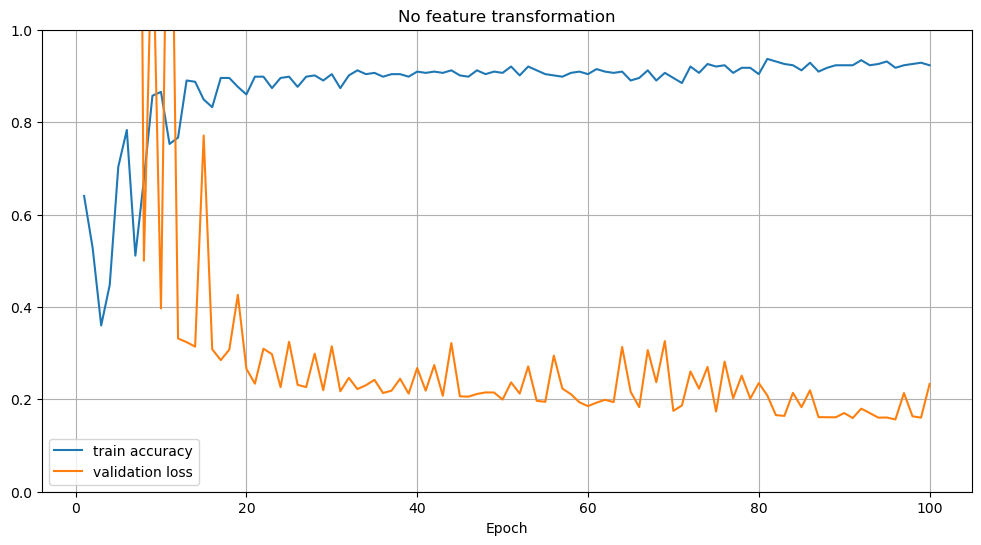

In [16]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1]), plt.xlabel('Epoch')
plt.title('No feature transformation')
plt.show()

#### 2. 데이터를 표준화한 경우

In [17]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2023
)

In [18]:
# 모델 정의
model2 = Sequential()
model2.add(Dense(100, input_shape=(30,), activation='relu'))    # 입력
model2.add(Dense(24, activation='relu'))        # 은닉
model2.add(Dense(1, activation='sigmoid'))      # 출력
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               3100      
                                                                 
 dense_6 (Dense)             (None, 24)                2424      
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5549 (21.68 KB)
Trainable params: 5549 (21.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# 모델 컴파일
model2.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [20]:
# 모델 학습
history2 = model2.fit(X_train2, y_train2, validation_split=0.2, epochs=100, batch_size=100, verbose=0)

In [21]:
# 모델 평가
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 3ms/step - loss: 0.2649 - accuracy: 0.9474


[0.26488879323005676, 0.9473684430122375]

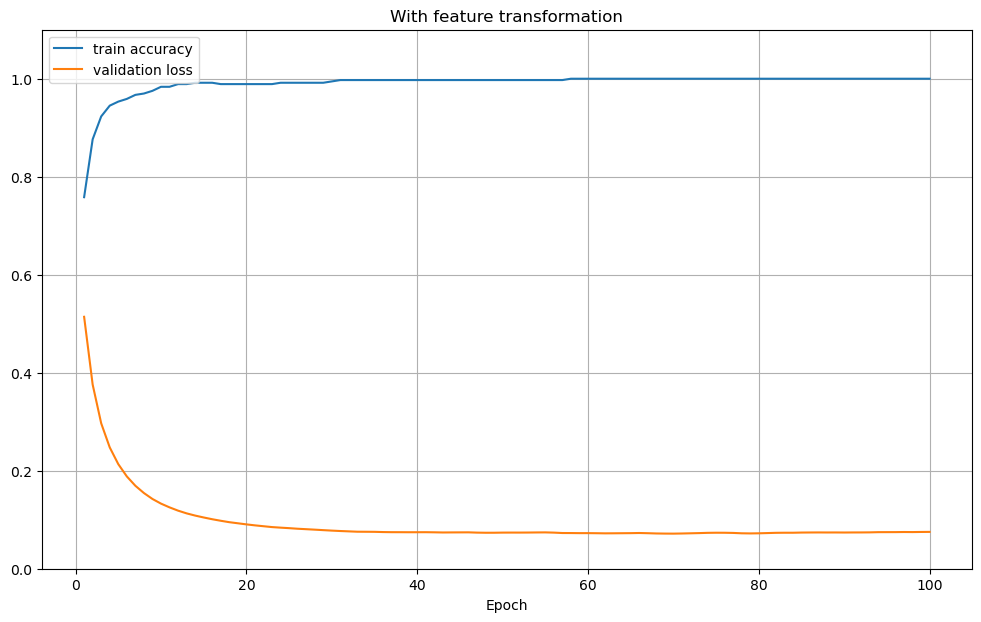

In [22]:
# 학습과정 시각화
y_acc2 = history2.history['accuracy']
y_vloss2 = history2.history['val_loss']

plt.figure(figsize=(12,7))
plt.plot(xs, y_acc2, label='train accuracy')
plt.plot(xs, y_vloss2, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.1]), plt.xlabel('Epoch')
plt.title('With feature transformation')
plt.show()